# Test basic network behaviors are as expected

## Test passive membrane properties using neurons with different time constants

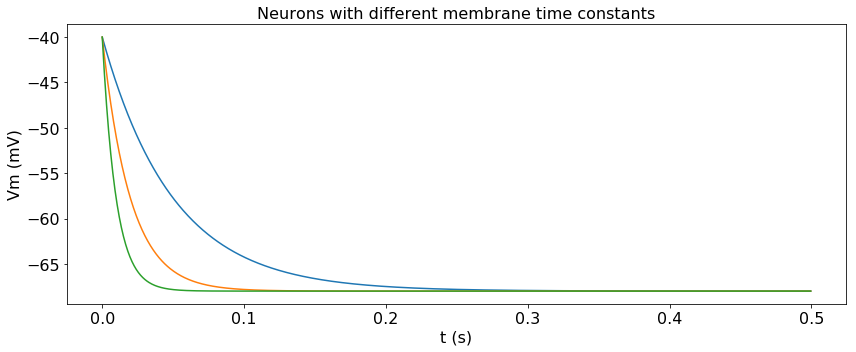

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.036 * np.ones(3)
v_reset = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))

vs_0 = -0.04 * np.ones(3)

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, dt=dt, vs_0=vs_0)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * resp.vs)
ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants')

set_font_size(ax, 16)

## Test current injection evoked spiking

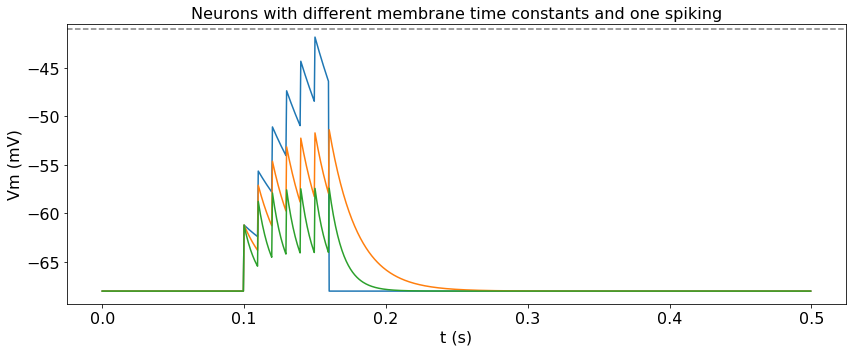

In [2]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_reset = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))

i_ext = np.zeros((len(ts), 3))
ts_i_ext = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_i_ext:
    i_ext[int(t/dt), :] = 0.0068

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, i_ext=i_ext, dt=dt)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * resp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Test synaptic-input-induced spiking

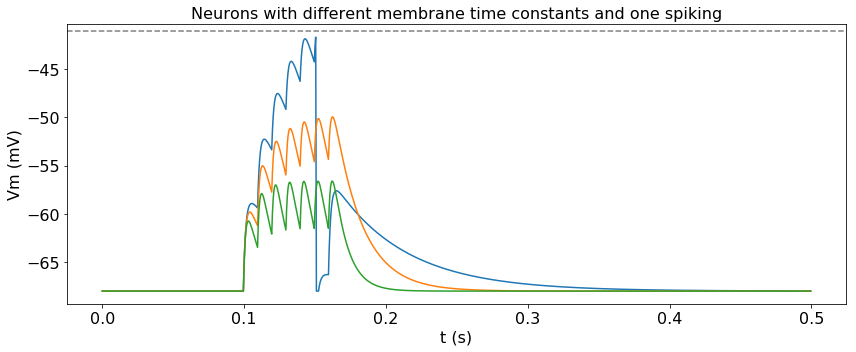

In [3]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_reset = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, dt=dt)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * resp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Run identical smln where vs and gs are stored as float16

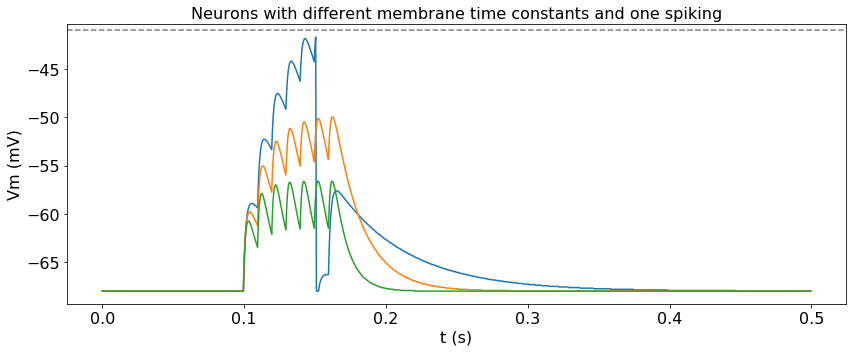

In [4]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_reset = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, dt=dt, store={'vs': np.float16, 'gs': np.float16})

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * resp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Run identical smln where gs are not stored

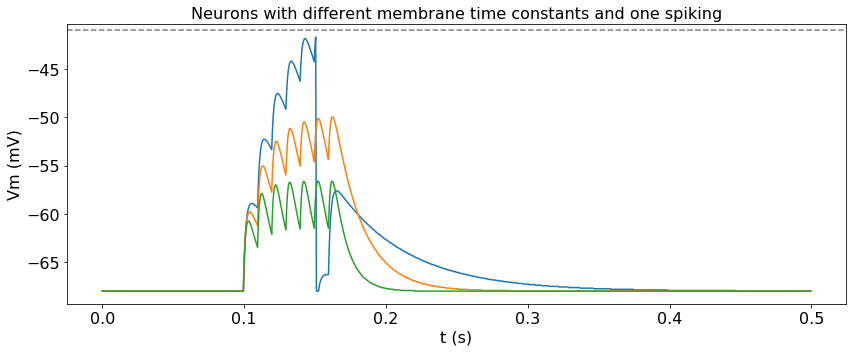

In [5]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_reset = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, dt=dt, store={'vs': np.float16, 'gs': None})

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * resp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Run identical smln where only spks are stored

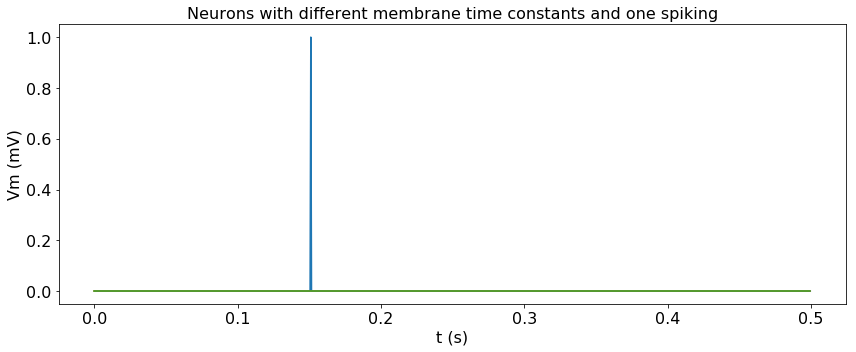

In [6]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_reset = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, dt=dt, store={'vs': None, 'gs': None, 'g_ahp': None})

assert resp.vs is None
assert resp.gs is None
assert resp.g_ahp is None

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, resp.spks.astype(int))

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Test afterhyperpolarization

Here we show a neuron's response to tetanic stimulus with and without afterhyperpolarization.

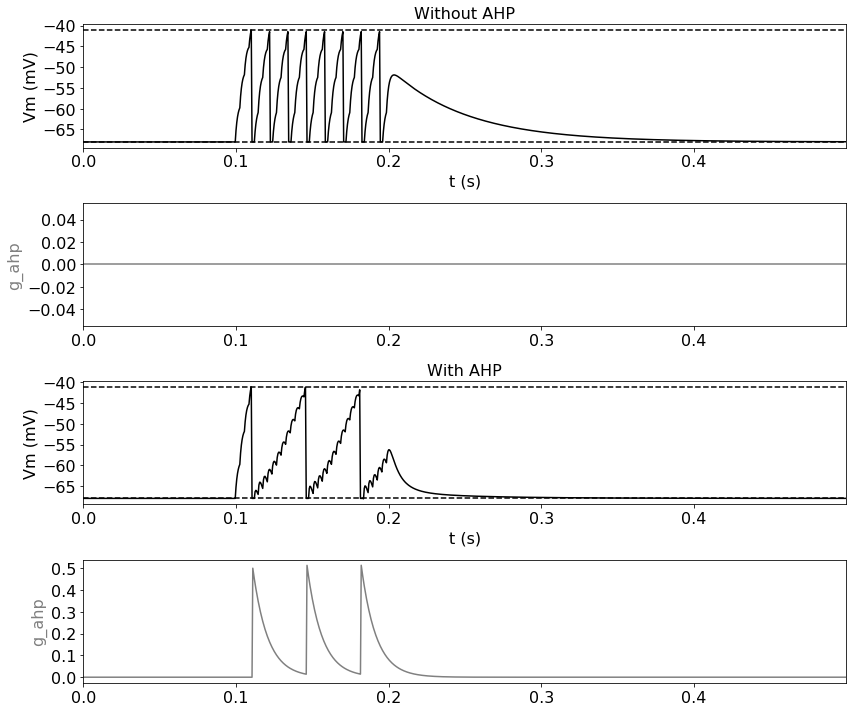

In [7]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05])
e_l = -0.068 * np.ones(1)
v_th = -0.041 * np.ones(1)
v_reset = -0.068 * np.ones(1)
t_r = 0.002 * np.ones(1)
e_ahp = -0.07
t_ahp = 0.01
w_ahp = 0.5
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((1, 1))}
ws_up = {'E': 0.04 * np.eye(1)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)

# set up input spikes
spks_up = np.zeros((len(ts), 1))
ts_spks_up = np.arange(0.1, 0.2, 0.003)

for t in ts_spks_up:
    spks_up[int(t/dt), 0] = 1

# run basic ntwk
ntwk_basic = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp_basic = ntwk_basic.run(spks_up=spks_up, dt=dt)

# run ntwk with nonzero AHP term
ntwk_ahp = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    e_ahp=e_ahp, t_ahp=t_ahp, w_ahp=w_ahp,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp_ahp = ntwk_ahp.run(spks_up=spks_up, dt=dt)

rsps = [rsp_basic, rsp_ahp]
titles = ['Without AHP', 'With AHP']

# plot both ntwk responses
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True)
axs = [axs[:2], axs[2:]]

for axs_, rsp, title in zip(axs, rsps, titles):
    
    axs_[0].plot(ts, 1000 * rsp.vs, color='k')
    axs_[0].axhline(1000*e_l, color='k', ls='--')
    axs_[0].axhline(1000*v_th, color='k', ls='--')
    axs_[0].set_xlim(ts[0], ts[-1])
    
    axs_[0].set_xlabel('t (s)')
    axs_[0].set_ylabel('Vm (mV)')
    axs_[0].set_title(title)
    
    axs_[1].plot(ts, rsp.g_ahp, color='gray')
    axs_[1].set_xlim(ts[0], ts[-1])

    axs_[1].set_ylabel('g_ahp', color='gray')
    
    for ax in axs_:
        set_font_size(ax, 16)

## Test forcing network's voltages and spikes

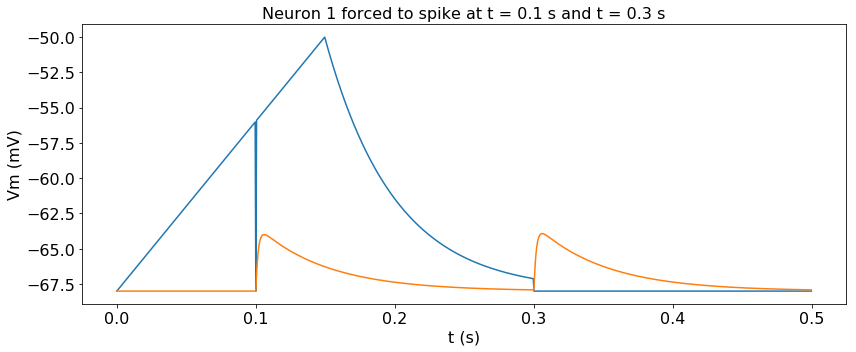

In [8]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.05])
e_l = -0.068 * np.ones(2)
v_th = -0.036 * np.ones(2)
v_reset = -0.068 * np.ones(2)
t_r = 0.002 * np.ones(2)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.array([[0., 0], [0.017, 0]])}
ws_up = {'E': np.zeros((2, 2))}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 2))

vs_forced = np.array([np.linspace(-0.068, -0.050, 300), np.nan * np.zeros(300)]).T

spks_forced = np.zeros((601, 2))
spks_forced[200, 0] = 1
spks_forced[600, 0] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt, vs_forced=vs_forced, spks_forced=spks_forced)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron 1 forced to spike at t = 0.1 s and t = 0.3 s')

set_font_size(ax, 16)

## Test cells with different refractory periods

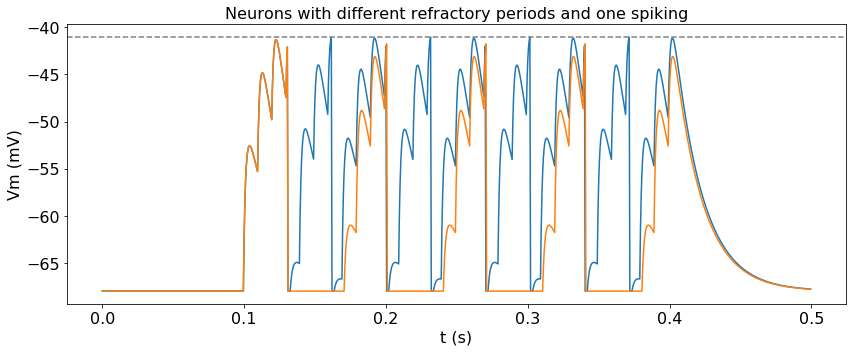

In [9]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = 0.02 * np.ones(2)
e_l = -0.068 * np.ones(2)
v_th = -0.041 * np.ones(2)
v_reset = -0.068 * np.ones(2)
t_r = np.array([.002, .04])
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((2, 2))}
ws_up = {'E': 0.08 * np.eye(2)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 2))
ts_spks_up = np.arange(.1, .4, .01)

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_reset=v_reset, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

resp = ntwk.run(spks_up=spks_up, dt=dt)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * resp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different refractory periods and one spiking')

set_font_size(ax, 16)

## Test high resting potential vs excitatory barrage equivalence

In [10]:
%reset -f
%matplotlib inline
import pdb
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size

import PARAMS as P

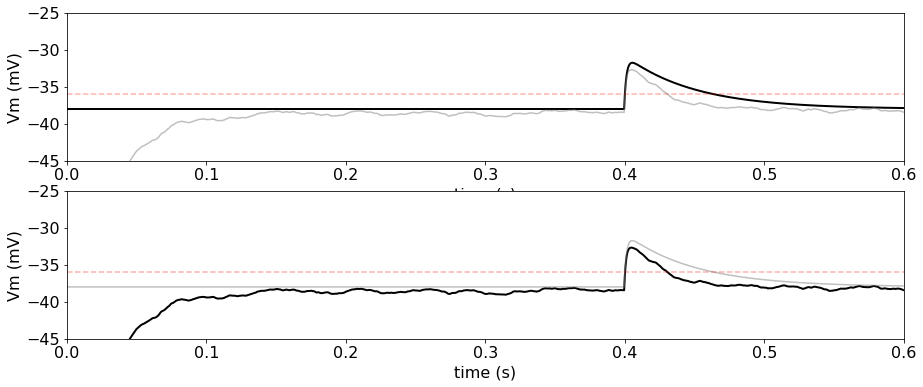

In [11]:
DT = .0005
W_E_PC_ST = 0.0001
W_E_PC_PC = 0.05
RATE_ST = 38000
DUR = 0.6
STIM = 0.4
SEED = 6

np.random.seed(SEED)

# upstream weight matrices
w_up_e = np.array([
    #       EC      PC_UP
    [       0., W_E_PC_PC],
    [W_E_PC_ST, W_E_PC_PC],
])

# upstream spk inputs
t = np.arange(0, DUR, DT)
# 1st col EC, 2nd col upstream PC
spks_up = np.zeros((len(t), 2))

# EC barrage
spks_up[:, 0] = np.random.poisson(RATE_ST * DT, t.shape)
# upstream PC input
spks_up[int(STIM / DT), 1] = 1

# make ntwk
ntwk = LIFNtwk(
    t_m=P.T_M_PC,
    e_l=np.array([P.E_L_PC + 0.03, P.E_L_PC]),
    v_th=100, v_reset=P.V_R_PC, t_r=np.repeat(P.T_R_PC, 2),
    es_syn={'E': P.E_E}, ts_syn={'E': P.T_E},
    ws_up={'E': w_up_e},
    ws_rcr={'E': np.zeros((2, 2))},
)

# run ntwk
vs_0 = np.array([P.E_L_PC + 0.03, P.E_L_PC])
rsp = ntwk.run(spks_up=spks_up, dt=DT, vs_0=vs_0)

# plot results
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
axs[0].plot(t, 1000*rsp.vs[:, 0], color='k', lw=2)
axs[0].plot(t, 1000*rsp.vs[:, 1], color='gray', alpha=0.5)
axs[1].plot(t, 1000*rsp.vs[:, 1], color='k', lw=2)
axs[1].plot(t, 1000*rsp.vs[:, 0], color='gray', alpha=0.5)

for ax in axs:
    ax.axhline(1000*P.V_TH_PC, color='r', ls='--', alpha=0.3)
    
    ax.set_xlim(0, DUR)
    ax.set_ylim(-45, -25)
    
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Vm (mV)')
    
    set_font_size(ax, 16)

Test passed if the gray and green EPSPs are about the same size in both panels.

# Test connectivity functions

## Test function to combine multiple weight matrices into "block" matrix

In [12]:
%reset -f
import numpy as np

from ntwk import join_w

### Square connectivity matrix

In [13]:
w_e_correct = np.array([
    # I   I   E   E   E   I   I
    [ 0,  0,  1,  2,  3,  0,  0],  # I
    [ 0,  0,  4,  5,  6,  0,  0],  # I
    [ 0,  0,  1,  2,  3,  0,  0],  # E
    [ 0,  0,  4,  5,  6,  0,  0],  # E
    [ 0,  0,  7,  8,  9,  0,  0],  # E
    [ 0,  0,  7,  8,  9,  0,  0],  # I
    [ 0,  0, 10, 11, 12,  0,  0],  # I
])

w_i_correct = np.array([
    # I   I   E   E   E   I   I
    [ 1,  2,  0,  0,  0,  3,  4],  # I
    [ 5,  6,  0,  0,  0,  7,  8],  # I
    [ 1,  2,  0,  0,  0,  3,  4],  # E
    [ 5,  6,  0,  0,  0,  7,  8],  # E
    [ 9, 10,  0,  0,  0, 11, 12],  # E
    [ 9, 10,  0,  0,  0, 11, 12],  # I
    [13, 14,  0,  0,  0, 15, 16],  # I
])

w_e_e_e = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

w_e_i_e = np.array([
    [ 1,  2,  3],
    [ 4,  5,  6],
    [ 7,  8,  9],
    [10, 11, 12],
])

w_i_e_i = np.array([
    [ 1,  2,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11, 12],
])

w_i_i_i = np.array([
    [ 1,  2,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11, 12],
    [13, 14, 15, 16],
])

cells = {
    'E': np.array([0, 0, 1, 1, 1, 0, 0], bool),
    'I': np.array([1, 1, 0, 0, 0, 1, 1], bool),
}

ws = {
    'E': {
        ('E', 'E'): w_e_e_e,
        ('I', 'E'): w_e_i_e,
    },
    'I': {
        ('E', 'I'): w_i_e_i,
        ('I', 'I'): w_i_i_i,
    }
}

ws_full = join_w(targs=cells, srcs=cells, ws=ws)

np.testing.assert_array_equal(ws_full['E'], w_e_correct)
np.testing.assert_array_equal(ws_full['I'], w_i_correct)

print('Tests passed.')

Tests passed.


### Non-square connectivity matrix

In [14]:
w_e_correct = np.array([
    # UE  UI  UI  UE  UE
    [ 1,  0,  0,  2,  3],  # DE
    [ 1,  0,  0,  2,  3],  # DI
    [ 4,  0,  0,  5,  6],  # DE
    [ 4,  0,  0,  5,  6],  # DI
    [ 7,  0,  0,  8,  9],  # DI
    [10,  0,  0, 11, 12],  # DI
])

w_i_correct = np.array([
    # UE  UI  UI  UE  UE
    [ 0,  1,  2,  0,  0],  # DE
    [ 0,  1,  2,  0,  0],  # DI
    [ 0,  3,  4,  0,  0],  # DE
    [ 0,  3,  4,  0,  0],  # DI
    [ 0,  5,  6,  0,  0],  # DI
    [ 0,  7,  8,  0,  0],  # DI
])

w_e_de_ue = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

w_e_di_ue = np.array([
    [ 1,  2,  3],
    [ 4,  5,  6],
    [ 7,  8,  9],
    [10, 11, 12],
])

w_i_de_ui = np.array([
    [ 1,  2],
    [ 3,  4],
])

w_i_di_ui = np.array([
    [ 1,  2],
    [ 3,  4],
    [ 5,  6],
    [ 7,  8],
])

targs = {
    'DE': np.array([1, 0, 1, 0, 0, 0], bool),
    'DI': np.array([0, 1, 0, 1, 1, 1], bool),
}

srcs = {
    'UE': np.array([1, 0, 0, 1, 1], bool),
    'UI': np.array([0, 1, 1, 0, 0], bool),
}

ws = {
    'E': {
        ('DE', 'UE'): w_e_de_ue,
        ('DI', 'UE'): w_e_di_ue,
    },
    'I': {
        ('DE', 'UI'): w_i_de_ui,
        ('DI', 'UI'): w_i_di_ui,
    }
}

ws_full = join_w(targs=targs, srcs=srcs, ws=ws)

np.testing.assert_array_equal(ws_full['E'], w_e_correct)
np.testing.assert_array_equal(ws_full['I'], w_i_correct)

print('Tests passed.')

Tests passed.


# Plasticity

## Test ST->PC heterosynaptic plasticity

Here we test the plasticity mechanism in our LIFNtwk class by ensuring that when we use physiological parameters (as specified in [parameters.ipynb](parameters.ipynb)) low rate spiking output in our PCs yield no synaptic weight change in the ST->PC weights but tetanic spiking outputs yield strong weight changes.

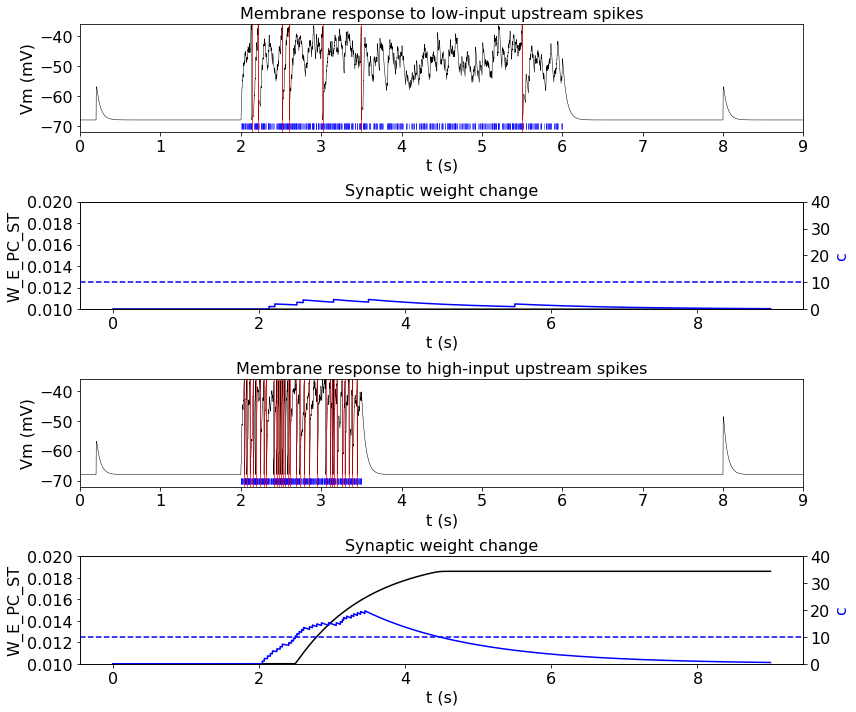

In [15]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
import disp

import PARAMS as P

DT = .0005

R_PL_LOW = 150
R_PL_HIGH = 350

DUR = 9
SPKS_UP_LOW_START = 2
SPKS_UP_LOW_END = 6
SPKS_UP_HIGH_START = 2
SPKS_UP_HIGH_END = 3.5
T_PC_ST_TEST_BEFORE = 0.2
T_PC_ST_TEST_AFTER = 8

W_E_PC_PL = 0.017
W_E_PC_ST = 0.01
W_E_PC_ST_MAX = 0.02

T_W = 1
T_C = 1.5
C_S = 10
B_C = .2


np.random.seed(0)

# we consider two PCs in the test ntwk with 3 inputs
# inp 0 is PL 0 (-> PC 0), inp 1 in ST (-> PC 0 & 1), inp 2 is PL 1 (-> PC 1)
ts = np.arange(0, DUR, DT)
spks_up = np.zeros((len(ts), 3))

# provide low rate to first PC
spks_up_low_mask = (ts >= SPKS_UP_LOW_START) & (ts < SPKS_UP_LOW_END)
spks_up[spks_up_low_mask, 0] = np.random.poisson(R_PL_LOW*DT, spks_up_low_mask.sum())

# provide high rate to second PC (inp 2)
spks_up_high_mask = (ts >= SPKS_UP_HIGH_START) & (ts < SPKS_UP_HIGH_END)
spks_up[spks_up_high_mask, 2] = np.random.poisson(R_PL_HIGH*DT, spks_up_high_mask.sum())

# provide test ST-->PC spks to measure EPSP strength
spks_up[int(T_PC_ST_TEST_BEFORE/DT), 1] = 5
spks_up[int(T_PC_ST_TEST_AFTER/DT), 1] = 5

# make synaptic weight matrices
ws_rcr = {
    'E': np.zeros((2, 2)),
}
ws_up = {
    'E': np.array([
        [W_E_PC_PL, W_E_PC_ST, 0],
        [0, W_E_PC_ST, W_E_PC_PL],
    ]),
}

# make masks for plastic weights
masks = {
    'E': np.array([
        [False, True, False],
        [False, True, False],
    ]),
}

# make plasticity dict
plasticity = {
    'masks': masks,
    'w_pc_st_maxs': {'E': np.array([W_E_PC_ST_MAX, W_E_PC_ST_MAX])},
    'T_W': T_W,
    'T_C': T_C,
    'C_S': C_S,
    'B_C': B_C,
}

# make ntwk
ES_SYN = {'E': P.E_E}
TS_SYN = {'E': P.T_E}

ntwk = LIFNtwk(
    t_m=np.repeat(P.T_M_PC, 2),
    e_l=np.repeat(P.E_L_PC, 2),
    v_th=np.repeat(P.V_TH_PC, 2),
    v_reset=np.repeat(P.V_R_PC, 2),
    t_r=np.repeat(0.002, 2),
    es_syn=ES_SYN, ts_syn=TS_SYN, ws_rcr=ws_rcr, ws_up=ws_up,
    plasticity=plasticity)

# run simulation with low and high upstream spiking rates
vs_0 = P.E_L_PC * np.ones(2)
gs_0 = {'E': np.zeros(2)}

rsp = ntwk.run(spks_up, DT, vs_0, gs_0)

# plot voltage and spiking responses and plastic synaptic weight time-series
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True)
axs_twin = []

# low-input voltage
axs[0].plot(ts, 1000 * rsp.vs[:, 0], color='k', lw=0.5)

# low-input upstream spikes
spk_ts_up_low = spks_up[:, 0].nonzero()[0] * DT
axs[0].scatter(spk_ts_up_low, -70*np.ones(spk_ts_up_low.shape), marker='|', c='b', lw=0.5)

# low-input output spikes
for t_spk_out in rsp.spks[:, 0].nonzero()[0] * DT:
    axs[0].axvline(t_spk_out, color='r', lw=0.7)

axs[0].set_xlim(ts[0], ts[-1])
axs[0].set_ylim(-72, 1000 * P.V_TH_PC)
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('Vm (mV)')
axs[0].set_title('Membrane response to low-input upstream spikes')

# low-input synaptic weight time-series
axs[1].plot(ts, rsp.ws_plastic['E'][:, 0], color='k')

axs[1].set_xlim(ts[0], ts[-1])
axs[1].set_ylim(W_E_PC_ST, W_E_PC_ST_MAX)

axs[1].set_xlabel('t (s)')
axs[1].set_ylabel('W_E_PC_ST')
axs[1].set_title('Synaptic weight change')

# spk-ctr auxiliary variable
axs_twin.append(axs[1].twinx())
axs_twin[0].plot(ts, rsp.cs[:, 0], color='b')
axs_twin[0].axhline(C_S, color='b', ls='--')
axs_twin[0].set_ylim(0, 4*C_S)
axs_twin[0].set_ylabel('c', color='b')

# high-input voltage
axs[2].plot(ts, 1000 * rsp.vs[:, 1], color='k', lw=0.5)

# high-input upstream spikes
spk_ts_up_high = spks_up[:, 2].nonzero()[0] * DT
axs[2].scatter(spk_ts_up_high, -70*np.ones(spk_ts_up_high.shape), marker='|', c='b', lw=0.5)

# high-input output spikes
for t_spk_out in rsp.spks[:, 1].nonzero()[0] * DT:
    axs[2].axvline(t_spk_out, color='r', lw=0.7)
    
axs[2].set_xlim(ts[0], ts[-1])
axs[2].set_ylim(-72, 1000 * P.V_TH_PC)
axs[2].set_xlabel('t (s)')
axs[2].set_ylabel('Vm (mV)')
axs[2].set_title('Membrane response to high-input upstream spikes')

# high-input synaptic weight time-series
axs[3].plot(ts, rsp.ws_plastic['E'][:, 1], color='k')

axs[3].set_xlim(ts[0], ts[-1])
axs[3].set_ylim(W_E_PC_ST, W_E_PC_ST_MAX)

axs[3].set_xlabel('t (s)')
axs[3].set_ylabel('W_E_PC_ST')
axs[3].set_title('Synaptic weight change')

# spk-ctr auxiliary variable
axs_twin.append(axs[3].twinx())
axs_twin[1].plot(ts, rsp.cs[:, 1], color='b')
axs_twin[1].axhline(C_S, color='b', ls='--')
axs_twin[1].set_ylim(0, 4*C_S)
axs_twin[1].set_ylabel('c', color='b')

for ax in list(axs) + axs_twin:
    disp.set_font_size(ax, 16)
    
# make sure only two E weights are marked as plastic
assert rsp.ws_plastic['E'].shape == (len(ts), 2)

## Rerun smln storing ws_plastic as float16

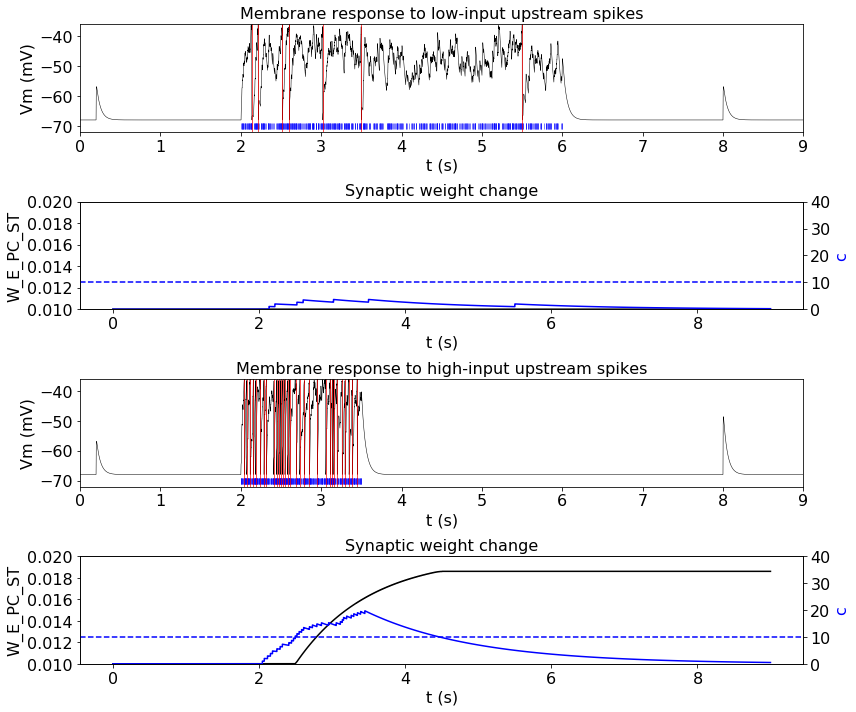

In [16]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
import disp

import PARAMS as P

DT = .0005

R_PL_LOW = 150
R_PL_HIGH = 350

DUR = 9
SPKS_UP_LOW_START = 2
SPKS_UP_LOW_END = 6
SPKS_UP_HIGH_START = 2
SPKS_UP_HIGH_END = 3.5
T_PC_ST_TEST_BEFORE = 0.2
T_PC_ST_TEST_AFTER = 8

W_E_PC_PL = 0.017
W_E_PC_ST = 0.01
W_E_PC_ST_MAX = 0.02

T_W = 1
T_C = 1.5
C_S = 10
B_C = .2


np.random.seed(0)

# we consider two PCs in the test ntwk with 3 inputs
# inp 0 is PL 0 (-> PC 0), inp 1 in ST (-> PC 0 & 1), inp 2 is PL 1 (-> PC 1)
ts = np.arange(0, DUR, DT)
spks_up = np.zeros((len(ts), 3))

# provide low rate to first PC
spks_up_low_mask = (ts >= SPKS_UP_LOW_START) & (ts < SPKS_UP_LOW_END)
spks_up[spks_up_low_mask, 0] = np.random.poisson(R_PL_LOW*DT, spks_up_low_mask.sum())

# provide high rate to second PC (inp 2)
spks_up_high_mask = (ts >= SPKS_UP_HIGH_START) & (ts < SPKS_UP_HIGH_END)
spks_up[spks_up_high_mask, 2] = np.random.poisson(R_PL_HIGH*DT, spks_up_high_mask.sum())

# provide test ST-->PC spks to measure EPSP strength
spks_up[int(T_PC_ST_TEST_BEFORE/DT), 1] = 5
spks_up[int(T_PC_ST_TEST_AFTER/DT), 1] = 5

# make synaptic weight matrices
ws_rcr = {
    'E': np.zeros((2, 2)),
}
ws_up = {
    'E': np.array([
        [W_E_PC_PL, W_E_PC_ST, 0],
        [0, W_E_PC_ST, W_E_PC_PL],
    ]),
}

# make masks for plastic weights
masks = {
    'E': np.array([
        [False, True, False],
        [False, True, False],
    ]),
}

# make plasticity dict
plasticity = {
    'masks': masks,
    'w_pc_st_maxs': {'E': np.array([W_E_PC_ST_MAX, W_E_PC_ST_MAX])},
    'T_W': T_W,
    'T_C': T_C,
    'C_S': C_S,
    'B_C': B_C,
}

# make ntwk
ES_SYN = {'E': P.E_E}
TS_SYN = {'E': P.T_E}

ntwk = LIFNtwk(
    t_m=np.repeat(P.T_M_PC, 2),
    e_l=np.repeat(P.E_L_PC, 2),
    v_th=np.repeat(P.V_TH_PC, 2),
    v_reset=np.repeat(P.V_R_PC, 2),
    t_r=np.repeat(0.002, 2),
    es_syn=ES_SYN, ts_syn=TS_SYN, ws_rcr=ws_rcr, ws_up=ws_up,
    plasticity=plasticity)

# run simulation with low and high upstream spiking rates
vs_0 = P.E_L_PC * np.ones(2)
gs_0 = {'E': np.zeros(2)}

rsp = ntwk.run(spks_up, DT, vs_0, gs_0, store={'ws_plastic': np.float16})

# plot voltage and spiking responses and plastic synaptic weight time-series
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True)
axs_twin = []

# low-input voltage
axs[0].plot(ts, 1000 * rsp.vs[:, 0], color='k', lw=0.5)

# low-input upstream spikes
spk_ts_up_low = spks_up[:, 0].nonzero()[0] * DT
axs[0].scatter(spk_ts_up_low, -70*np.ones(spk_ts_up_low.shape), marker='|', c='b', lw=0.5)

# low-input output spikes
for t_spk_out in rsp.spks[:, 0].nonzero()[0] * DT:
    axs[0].axvline(t_spk_out, color='r', lw=0.7)

axs[0].set_xlim(ts[0], ts[-1])
axs[0].set_ylim(-72, 1000 * P.V_TH_PC)
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('Vm (mV)')
axs[0].set_title('Membrane response to low-input upstream spikes')

# low-input synaptic weight time-series
axs[1].plot(ts, rsp.ws_plastic['E'][:, 0], color='k')

axs[1].set_xlim(ts[0], ts[-1])
axs[1].set_ylim(W_E_PC_ST, W_E_PC_ST_MAX)

axs[1].set_xlabel('t (s)')
axs[1].set_ylabel('W_E_PC_ST')
axs[1].set_title('Synaptic weight change')

# spk-ctr auxiliary variable
axs_twin.append(axs[1].twinx())
axs_twin[0].plot(ts, rsp.cs[:, 0], color='b')
axs_twin[0].axhline(C_S, color='b', ls='--')
axs_twin[0].set_ylim(0, 4*C_S)
axs_twin[0].set_ylabel('c', color='b')

# high-input voltage
axs[2].plot(ts, 1000 * rsp.vs[:, 1], color='k', lw=0.5)

# high-input upstream spikes
spk_ts_up_high = spks_up[:, 2].nonzero()[0] * DT
axs[2].scatter(spk_ts_up_high, -70*np.ones(spk_ts_up_high.shape), marker='|', c='b', lw=0.5)

# high-input output spikes
for t_spk_out in rsp.spks[:, 1].nonzero()[0] * DT:
    axs[2].axvline(t_spk_out, color='r', lw=0.7)
    
axs[2].set_xlim(ts[0], ts[-1])
axs[2].set_ylim(-72, 1000 * P.V_TH_PC)
axs[2].set_xlabel('t (s)')
axs[2].set_ylabel('Vm (mV)')
axs[2].set_title('Membrane response to high-input upstream spikes')

# high-input synaptic weight time-series
axs[3].plot(ts, rsp.ws_plastic['E'][:, 1], color='k')

axs[3].set_xlim(ts[0], ts[-1])
axs[3].set_ylim(W_E_PC_ST, W_E_PC_ST_MAX)

axs[3].set_xlabel('t (s)')
axs[3].set_ylabel('W_E_PC_ST')
axs[3].set_title('Synaptic weight change')

# spk-ctr auxiliary variable
axs_twin.append(axs[3].twinx())
axs_twin[1].plot(ts, rsp.cs[:, 1], color='b')
axs_twin[1].axhline(C_S, color='b', ls='--')
axs_twin[1].set_ylim(0, 4*C_S)
axs_twin[1].set_ylabel('c', color='b')

for ax in list(axs) + axs_twin:
    disp.set_font_size(ax, 16)
    
# make sure only two E weights are marked as plastic
assert rsp.ws_plastic['E'].shape == (len(ts), 2)

## Rerun smln without storing ws_plastic

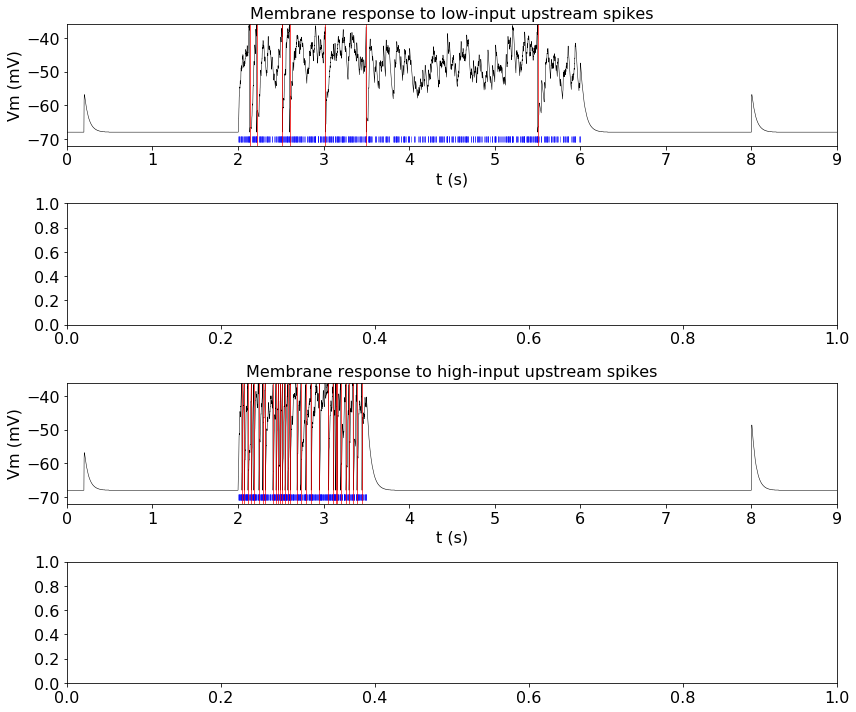

In [17]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
import disp

import PARAMS as P

DT = .0005

R_PL_LOW = 150
R_PL_HIGH = 350

DUR = 9
SPKS_UP_LOW_START = 2
SPKS_UP_LOW_END = 6
SPKS_UP_HIGH_START = 2
SPKS_UP_HIGH_END = 3.5
T_PC_ST_TEST_BEFORE = 0.2
T_PC_ST_TEST_AFTER = 8

W_E_PC_PL = 0.017
W_E_PC_ST = 0.01
W_E_PC_ST_MAX = 0.02

T_W = 1
T_C = 1.5
C_S = 10
B_C = .2


np.random.seed(0)

# we consider two PCs in the test ntwk with 3 inputs
# inp 0 is PL 0 (-> PC 0), inp 1 in ST (-> PC 0 & 1), inp 2 is PL 1 (-> PC 1)
ts = np.arange(0, DUR, DT)
spks_up = np.zeros((len(ts), 3))

# provide low rate to first PC
spks_up_low_mask = (ts >= SPKS_UP_LOW_START) & (ts < SPKS_UP_LOW_END)
spks_up[spks_up_low_mask, 0] = np.random.poisson(R_PL_LOW*DT, spks_up_low_mask.sum())

# provide high rate to second PC (inp 2)
spks_up_high_mask = (ts >= SPKS_UP_HIGH_START) & (ts < SPKS_UP_HIGH_END)
spks_up[spks_up_high_mask, 2] = np.random.poisson(R_PL_HIGH*DT, spks_up_high_mask.sum())

# provide test ST-->PC spks to measure EPSP strength
spks_up[int(T_PC_ST_TEST_BEFORE/DT), 1] = 5
spks_up[int(T_PC_ST_TEST_AFTER/DT), 1] = 5

# make synaptic weight matrices
ws_rcr = {
    'E': np.zeros((2, 2)),
}
ws_up = {
    'E': np.array([
        [W_E_PC_PL, W_E_PC_ST, 0],
        [0, W_E_PC_ST, W_E_PC_PL],
    ]),
}

# make masks for plastic weights
masks = {
    'E': np.array([
        [False, True, False],
        [False, True, False],
    ]),
}

# make plasticity dict
plasticity = {
    'masks': masks,
    'w_pc_st_maxs': {'E': np.array([W_E_PC_ST_MAX, W_E_PC_ST_MAX])},
    'T_W': T_W,
    'T_C': T_C,
    'C_S': C_S,
    'B_C': B_C,
}

# make ntwk
ES_SYN = {'E': P.E_E}
TS_SYN = {'E': P.T_E}

ntwk = LIFNtwk(
    t_m=np.repeat(P.T_M_PC, 2),
    e_l=np.repeat(P.E_L_PC, 2),
    v_th=np.repeat(P.V_TH_PC, 2),
    v_reset=np.repeat(P.V_R_PC, 2),
    t_r=np.repeat(0.002, 2),
    es_syn=ES_SYN, ts_syn=TS_SYN, ws_rcr=ws_rcr, ws_up=ws_up,
    plasticity=plasticity)

# run simulation with low and high upstream spiking rates
vs_0 = P.E_L_PC * np.ones(2)
gs_0 = {'E': np.zeros(2)}

rsp = ntwk.run(
    spks_up, DT, vs_0, gs_0,
    store={'vs': np.float16, 'gs': None, 'g_ahp': None, 'ws_plastic': None})

# plot voltage and spiking responses and plastic synaptic weight time-series
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True)
axs_twin = []

# low-input voltage
axs[0].plot(ts, 1000 * rsp.vs[:, 0], color='k', lw=0.5)

# low-input upstream spikes
spk_ts_up_low = spks_up[:, 0].nonzero()[0] * DT
axs[0].scatter(spk_ts_up_low, -70*np.ones(spk_ts_up_low.shape), marker='|', c='b', lw=0.5)

# low-input output spikes
for t_spk_out in rsp.spks[:, 0].nonzero()[0] * DT:
    axs[0].axvline(t_spk_out, color='r', lw=0.7)

axs[0].set_xlim(ts[0], ts[-1])
axs[0].set_ylim(-72, 1000 * P.V_TH_PC)
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('Vm (mV)')
axs[0].set_title('Membrane response to low-input upstream spikes')

# high-input voltage
axs[2].plot(ts, 1000 * rsp.vs[:, 1], color='k', lw=0.5)

# high-input upstream spikes
spk_ts_up_high = spks_up[:, 2].nonzero()[0] * DT
axs[2].scatter(spk_ts_up_high, -70*np.ones(spk_ts_up_high.shape), marker='|', c='b', lw=0.5)

# high-input output spikes
for t_spk_out in rsp.spks[:, 1].nonzero()[0] * DT:
    axs[2].axvline(t_spk_out, color='r', lw=0.7)
    
axs[2].set_xlim(ts[0], ts[-1])
axs[2].set_ylim(-72, 1000 * P.V_TH_PC)
axs[2].set_xlabel('t (s)')
axs[2].set_ylabel('Vm (mV)')
axs[2].set_title('Membrane response to high-input upstream spikes')

for ax in list(axs) + axs_twin:
    disp.set_font_size(ax, 16)
    
# make sure only two E weights are marked as plastic
assert rsp.ws_plastic['E'].shape == (1, 2)

## Test plasticity with different initial ST->PC weights and maxes

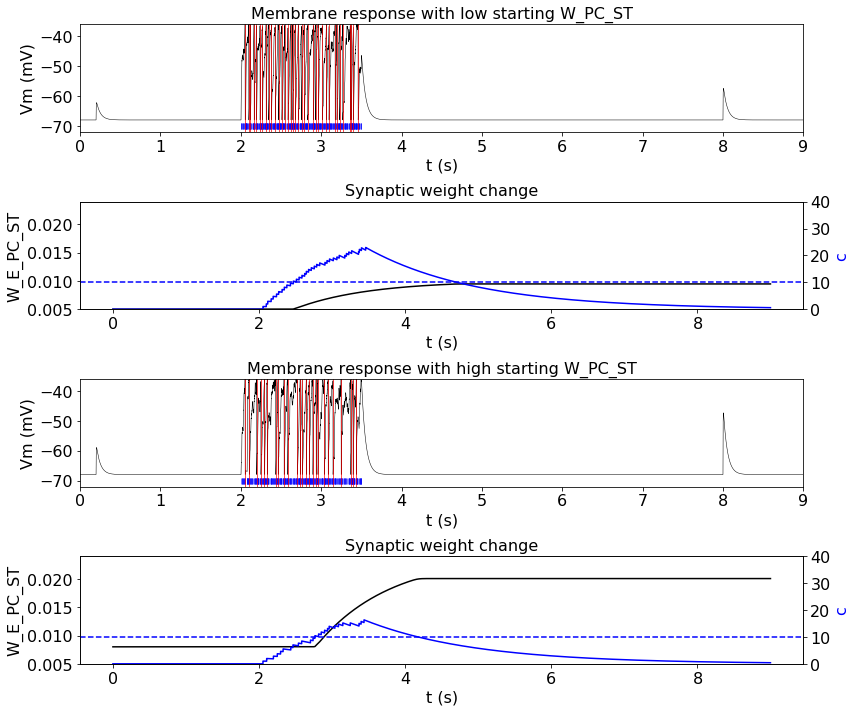

In [18]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
import disp

import PARAMS as P

DT = .0005

R_PL_HIGH = 350

DUR = 9
SPKS_UP_HIGH_START = 2
SPKS_UP_HIGH_END = 3.5
T_PC_ST_TEST_BEFORE = 0.2
T_PC_ST_TEST_AFTER = 8

W_E_PC_PL = 0.017
W_E_PC_ST_0 = 0.005
W_E_PC_ST_1 = 0.008
W_E_PC_ST_MAX_0 = 0.01
W_E_PC_ST_MAX_1 = 0.024

T_W = 1
T_C = 1.5
C_S = 10
B_C = .2


np.random.seed(0)

# we consider two PCs in the test ntwk with 3 inputs
# inp 0 is PL 0 (-> PC 0), inp 1 in ST (-> PC 0 & 1), inp 2 is PL 1 (-> PC 1)
ts = np.arange(0, DUR, DT)
spks_up = np.zeros((len(ts), 3))

# provide high rates to both PC (inp 0, 2)
spks_up_high_mask = (ts >= SPKS_UP_HIGH_START) & (ts < SPKS_UP_HIGH_END)
spks_up[spks_up_high_mask, 0] = np.random.poisson(R_PL_HIGH*DT, spks_up_high_mask.sum())
spks_up[spks_up_high_mask, 2] = np.random.poisson(R_PL_HIGH*DT, spks_up_high_mask.sum())

# provide test ST-->PC spks to measure EPSP strength
spks_up[int(T_PC_ST_TEST_BEFORE/DT), 1] = 5
spks_up[int(T_PC_ST_TEST_AFTER/DT), 1] = 5

# make synaptic weight matrices
ws_rcr = {
    'E': np.zeros((2, 2)),
}
ws_up = {
    'E': np.array([
        [W_E_PC_PL, W_E_PC_ST_0, 0],
        [0, W_E_PC_ST_1, W_E_PC_PL],
    ]),
}

# make masks for plastic weights
masks = {
    'E': np.array([
        [False, True, False],
        [False, True, False],
    ]),
}

# make plasticity dict
plasticity = {
    'masks': masks,
    'w_pc_st_maxs': {'E': np.array([W_E_PC_ST_MAX_0, W_E_PC_ST_MAX_1])},
    'T_W': T_W,
    'T_C': T_C,
    'C_S': C_S,
    'B_C': B_C,
}

# make ntwk
ES_SYN = {'E': P.E_E}
TS_SYN = {'E': P.T_E}

ntwk = LIFNtwk(
    t_m=np.repeat(P.T_M_PC, 2),
    e_l=np.repeat(P.E_L_PC, 2),
    v_th=np.repeat(P.V_TH_PC, 2),
    v_reset=np.repeat(P.V_R_PC, 2),
    t_r=np.repeat(0.002, 2),
    es_syn=ES_SYN, ts_syn=TS_SYN, ws_rcr=ws_rcr, ws_up=ws_up,
    plasticity=plasticity)

# run simulation with low and high upstream spiking rates
vs_0 = P.E_L_PC * np.ones(2)
gs_0 = {'E': np.zeros(2)}

rsp = ntwk.run(spks_up, DT, vs_0, gs_0)

# plot voltage and spiking responses and plastic synaptic weight time-series
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True)
axs_twin = []

# low-input voltage
axs[0].plot(ts, 1000 * rsp.vs[:, 0], color='k', lw=0.5)

# low-input upstream spikes
spk_ts_up_low = spks_up[:, 0].nonzero()[0] * DT
axs[0].scatter(spk_ts_up_low, -70*np.ones(spk_ts_up_low.shape), marker='|', c='b', lw=0.5)

# low-input output spikes
for t_spk_out in rsp.spks[:, 0].nonzero()[0] * DT:
    axs[0].axvline(t_spk_out, color='r', lw=0.7)

axs[0].set_xlim(ts[0], ts[-1])
axs[0].set_ylim(-72, 1000 * P.V_TH_PC)
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('Vm (mV)')
axs[0].set_title('Membrane response with low starting W_PC_ST')

# low-input synaptic weight time-series
axs[1].plot(ts, rsp.ws_plastic['E'][:, 0], color='k')

axs[1].set_xlim(ts[0], ts[-1])
axs[1].set_ylim(W_E_PC_ST_0, W_E_PC_ST_MAX_1)

axs[1].set_xlabel('t (s)')
axs[1].set_ylabel('W_E_PC_ST')
axs[1].set_title('Synaptic weight change')

# spk-ctr auxiliary variable
axs_twin.append(axs[1].twinx())
axs_twin[0].plot(ts, rsp.cs[:, 0], color='b')
axs_twin[0].axhline(C_S, color='b', ls='--')
axs_twin[0].set_ylim(0, 4*C_S)
axs_twin[0].set_ylabel('c', color='b')

# high-input voltage
axs[2].plot(ts, 1000 * rsp.vs[:, 1], color='k', lw=0.5)

# high-input upstream spikes
spk_ts_up_high = spks_up[:, 2].nonzero()[0] * DT
axs[2].scatter(spk_ts_up_high, -70*np.ones(spk_ts_up_high.shape), marker='|', c='b', lw=0.5)

# high-input output spikes
for t_spk_out in rsp.spks[:, 1].nonzero()[0] * DT:
    axs[2].axvline(t_spk_out, color='r', lw=0.7)
    
axs[2].set_xlim(ts[0], ts[-1])
axs[2].set_ylim(-72, 1000 * P.V_TH_PC)
axs[2].set_xlabel('t (s)')
axs[2].set_ylabel('Vm (mV)')
axs[2].set_title('Membrane response with high starting W_PC_ST')

# high-input synaptic weight time-series
axs[3].plot(ts, rsp.ws_plastic['E'][:, 1], color='k')

axs[3].set_xlim(ts[0], ts[-1])
axs[3].set_ylim(W_E_PC_ST_0, W_E_PC_ST_MAX_1)

axs[3].set_xlabel('t (s)')
axs[3].set_ylabel('W_E_PC_ST')
axs[3].set_title('Synaptic weight change')

# spk-ctr auxiliary variable
axs_twin.append(axs[3].twinx())
axs_twin[1].plot(ts, rsp.cs[:, 1], color='b')
axs_twin[1].axhline(C_S, color='b', ls='--')
axs_twin[1].set_ylim(0, 4*C_S)
axs_twin[1].set_ylabel('c', color='b')

for ax in list(axs) + axs_twin:
    disp.set_font_size(ax, 16)
    
# make sure only two E weights are marked as plastic
assert rsp.ws_plastic['E'].shape == (len(ts), 2)